In [42]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb

df_medicine = pd.read_json('../dataset/medicine_details.json')
new_df_medicine = df_medicine.transpose()
new_df_medicine.head()

,Medicine Name,Composition,Uses,Side_effects,Manufacturer,Excellent Review %,Average Review %,Poor Review %
Avastin 400mg Injection,Avastin 400mg Injection,Bevacizumab (400mg),"[Cancer of colon and rectum, Non-small cell lu...","[Rectal bleeding, Taste change, Headache, Nose...",Roche Products India Pvt Ltd,22,56,22
Augmentin 625 Duo Tablet,Augmentin 625 Duo Tablet,Amoxycillin (500mg) + Clavulanic Acid (125mg),[Treatment of Bacterial infections],"[Vomiting, Nausea, Diarrhea, Mucocutaneous can...",Glaxo SmithKline Pharmaceuticals Ltd,47,35,18
Azithral 500 Tablet,Azithral 500 Tablet,Azithromycin (500mg),[Treatment of Bacterial infections],"[Nausea, Abdominal pain, Diarrhea]",Alembic Pharmaceuticals Ltd,39,40,21
Ascoril LS Syrup,Ascoril LS Syrup,Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...,[Treatment of Cough with mucus],"[Nausea, Vomiting, Diarrhea, Upset stomach, St...",Glenmark Pharmaceuticals Ltd,24,41,35
Aciloc 150 Tablet,Aciloc 150 Tablet,Ranitidine (150mg),[Treatment of Gastroesophageal reflux disease ...,"[Headache, Diarrhea, Gastrointestinal disturba...",Cadila Pharmaceuticals Ltd,34,37,29


In [43]:
new_df_medicine['Medicine Name'].value_counts()

Medicine Name
Avastin 400mg Injection            1
Pregalex-M Capsule                 1
Predace 16 Tablet                  1
Princiclav 500 mg/125 mg Tablet    1
Predace 8mg Tablet                 1
                                  ..
Ibithral 500mg Tablet              1
Itriben 200 Capsule                1
Itracoe 400 SR Tablet              1
Isofeel 0.1 Gel                    1
Zedruff Shampoo                    1
Name: count, Length: 11498, dtype: int64

In [44]:
new_df_medicine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, Avastin 400mg Injection to Zedruff Shampoo
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11498 non-null  object
 1   Composition         11498 non-null  object
 2   Uses                11498 non-null  object
 3   Side_effects        11498 non-null  object
 4   Manufacturer        11498 non-null  object
 5   Excellent Review %  11498 non-null  object
 6   Average Review %    11498 non-null  object
 7   Poor Review %       11498 non-null  object
dtypes: object(8)
memory usage: 1.0+ MB


In [45]:
new_df_medicine.isna().sum()

Medicine Name         0
Composition           0
Uses                  0
Side_effects          0
Manufacturer          0
Excellent Review %    0
Average Review %      0
Poor Review %         0
dtype: int64

In [46]:
new_df_medicine = new_df_medicine.astype({'Excellent Review %':'int', 'Average Review %':'int', 'Poor Review %':'int'})
new_df_medicine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, Avastin 400mg Injection to Zedruff Shampoo
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medicine Name       11498 non-null  object
 1   Composition         11498 non-null  object
 2   Uses                11498 non-null  object
 3   Side_effects        11498 non-null  object
 4   Manufacturer        11498 non-null  object
 5   Excellent Review %  11498 non-null  int32 
 6   Average Review %    11498 non-null  int32 
 7   Poor Review %       11498 non-null  int32 
dtypes: int32(3), object(5)
memory usage: 931.8+ KB


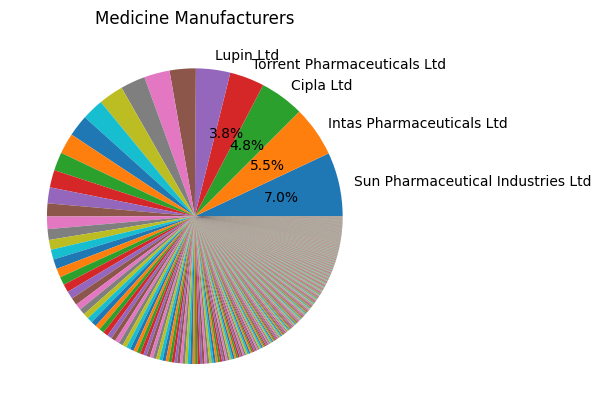

In [47]:
percentages = new_df_medicine['Manufacturer'].value_counts() / new_df_medicine['Manufacturer'].value_counts().sum() * 100

new_df_medicine['Manufacturer'].value_counts().plot(kind='pie', labels=[label if i < 5 else '' for i, label in enumerate(new_df_medicine['Manufacturer'].value_counts().index)], autopct=lambda p: f'{p:.1f}%' if p >= percentages.nlargest(5).min() else '')
plt.ylabel('')
plt.title('Medicine Manufacturers')
plt.show()

In [48]:
numerical_summary = new_df_medicine.select_dtypes(include=['int32']).describe()

formatted_summary = numerical_summary.map(lambda n: f'{n:.2f}')

print(formatted_summary)

      Excellent Review % Average Review % Poor Review %
count           11498.00         11498.00      11498.00
mean               38.58            35.78         25.64
std                25.34            18.34         24.06
min                 0.00             0.00          0.00
25%                22.00            27.00          0.00
50%                34.00            35.00         22.00
75%                52.00            47.00         35.00
max               100.00            88.00        100.00


In [49]:
new_df_medicine.select_dtypes(include=['int32']).mean()

Excellent Review %    38.582188
Average Review %      35.779788
Poor Review %         25.638024
dtype: float64

In [50]:
new_df_medicine.select_dtypes(include=['int32']).median()

Excellent Review %    34.0
Average Review %      35.0
Poor Review %         22.0
dtype: float64

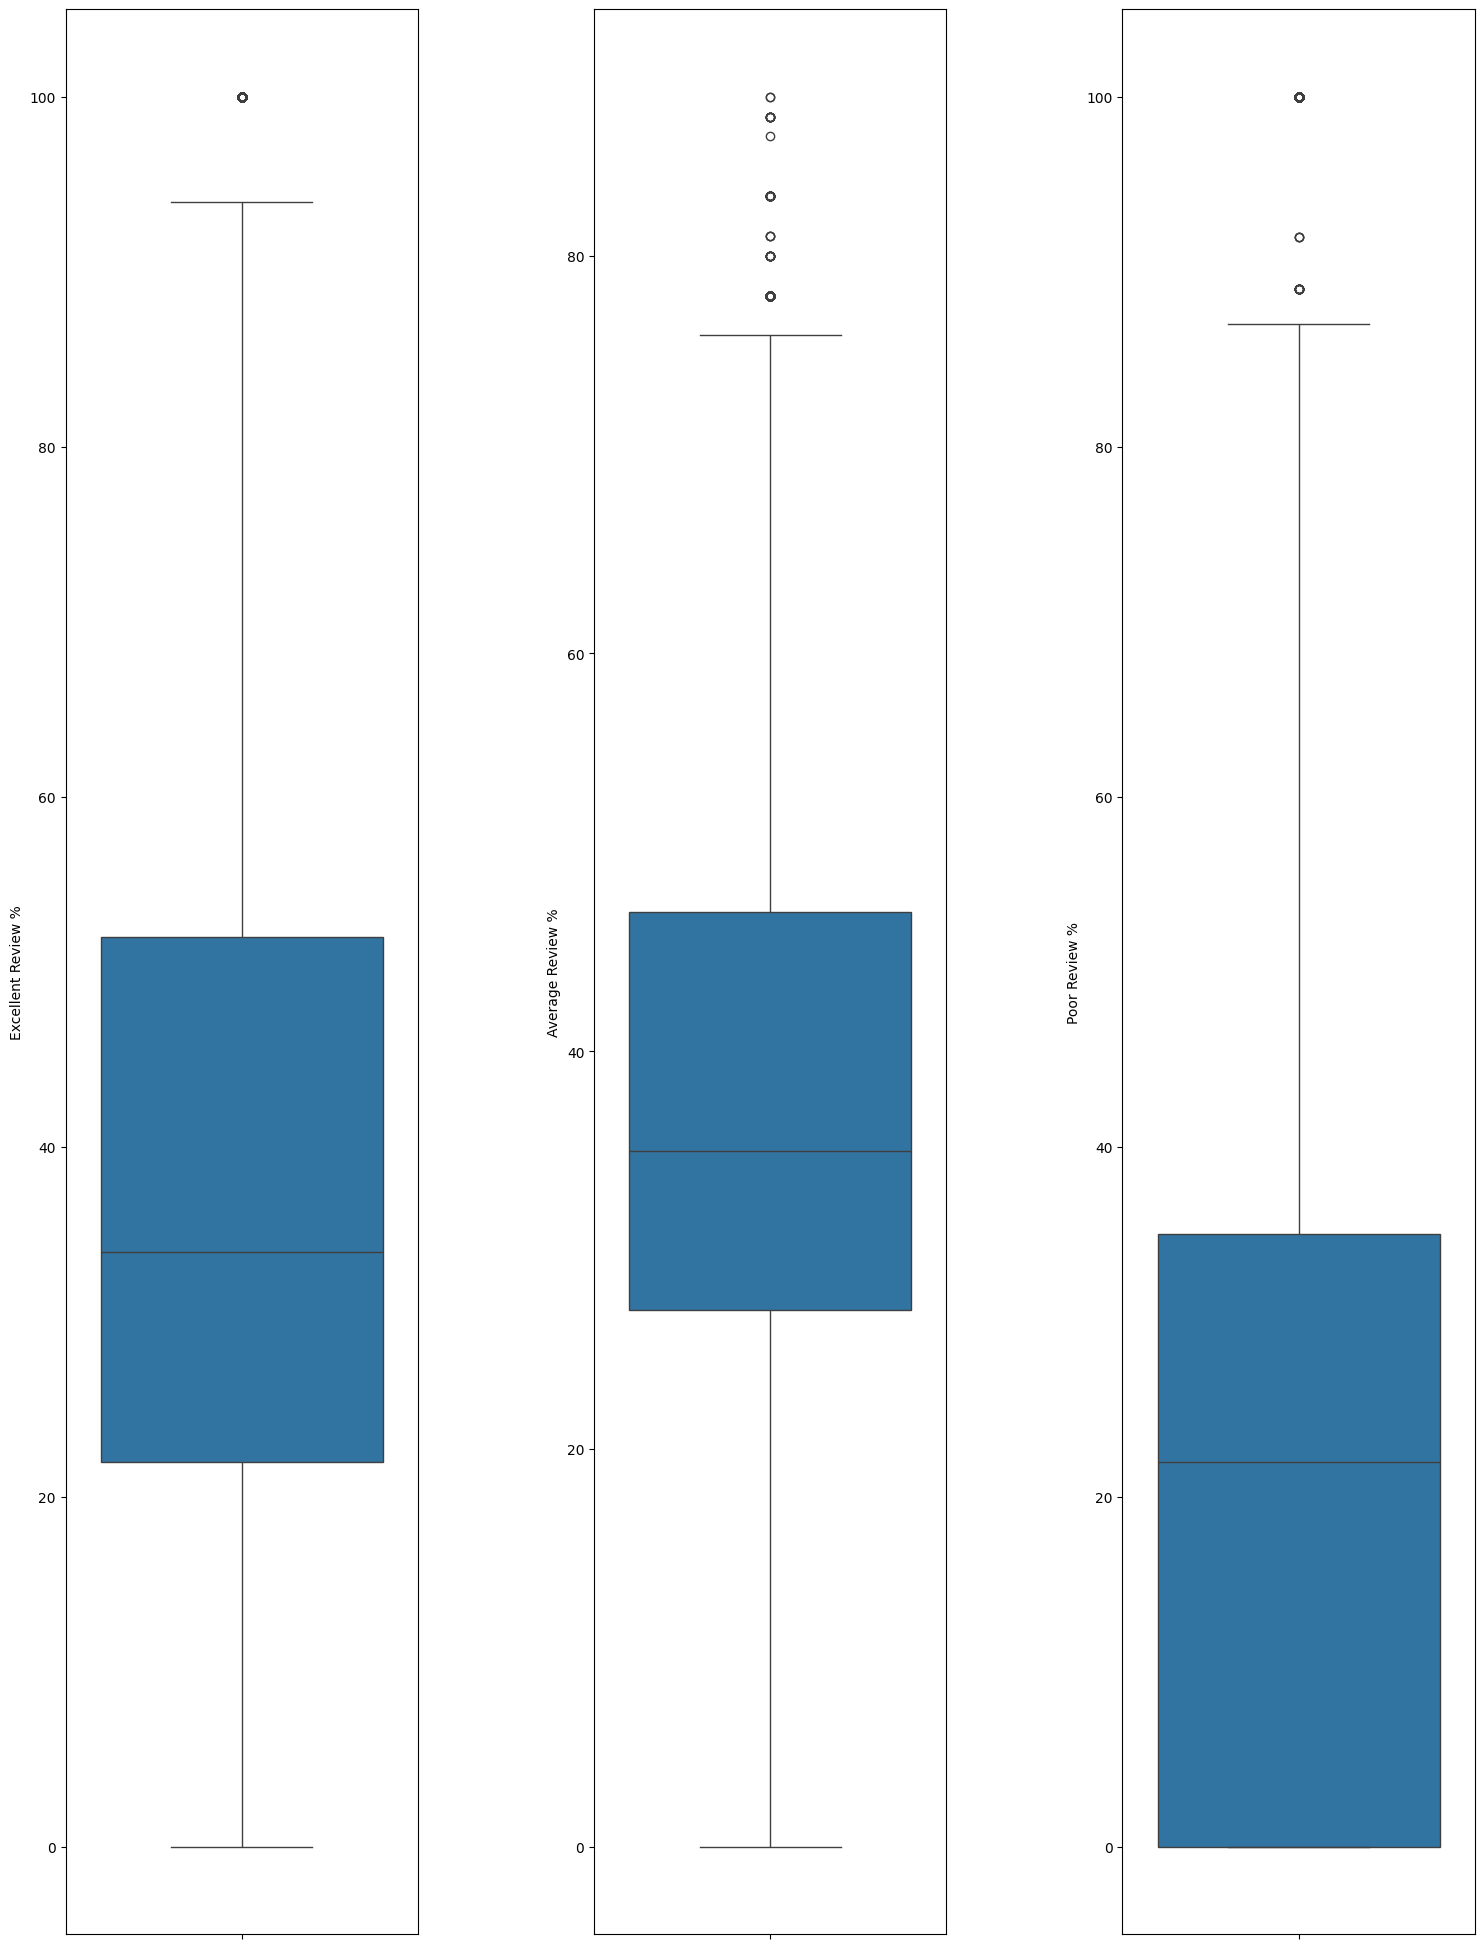

In [51]:
numerical = new_df_medicine.select_dtypes(include=['int32']).columns.tolist()

fig, axes = plt.subplots(math.ceil(len(numerical) / 4), 4, figsize=(25, 25))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()

for col, axis in zip(numerical, axes):
    sb.boxplot(data=new_df_medicine[col], ax=axis)

for i in range(len(numerical), len(axes)):
    fig.delaxes(axes[i])

plt.show()